<center>
<a href="https://exed.polytechnique.edu/fr" ><img src="https://exed.polytechnique.edu/sites/all/themes/college/images/logo.png" style="float:left; max-width: 360px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# [Scénarios d'Apprentissage Statistique](https://github.com/wikistat/Apprentissage)

# GRC: Score d'appétence d'un produit bancaire  en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

#### Résumé
Les données sont composées de 825 clients d'une banque décrits par 32 variables concernant leurs avoirs, et utilisations de leurs comptes. Après avoir réalisé, avec [R](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-R-Visa.ipynb) ou [Python](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-Python-Visa.ipynb), le premier objectif de segmentation ou profilage des types de comportement des clients, le 2ème consiste à estimer puis prévoir un *score d'appétence* pour un produit bancaie, ici la carte visa premier. Comparaison des différentes méthodes et algorihtmes d'apprentissage pour atteindre cet objectif de la régression logistique au *boosting* (*extrem gradient*) en passant par les arbres, les SVM ou random forest. Une procédure de validation croisée généralisée est itérée sur une selection de ces méthodes. Celles d'agrégation de modèles conduisent aux meilleurs résultats. 

## Introduction
### Objectif
Un  [calepin]((https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-Python-Visa.ipynb)), qu'il est préférable d'exécuter préalablement, décrit le premier objectif d'exploration puis segmentation ou profilage des types de comportement des clients d'une banque. 

Ce deuxième calepin propose de construire un [score d'appétence](http://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-scenar-app-visa.pdf) pour la carte *Visa Premier*. Ce deuxième objectif est intégré à la saison 3 ([Apprentissage Statistique](https://github.com/wikistat/Apprentissage)). Il s'agit d'un score d'appétence mais ce pourrait être le score d'attrition (*churn*) d'un opérateur téléphonique ou encore un score de défaillance d'un emprunteur ou de faillite d'une entreprise; les outils de modélisation sont les mêmes et sont très largement utilisés dans tout le secteur tertiaire pour l'aide à la décision.

Remarque: un [scénario](https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-scenar-app-visa.pdf) plus ancien propose une exécution avec SAS, encore utilisé dans de nombreuses grandes entreprises.


### Présentation des données
#### Les variables
La liste des variables est issue d'une base de données retraçant l'historique mensuel bancaire et les caractéristiques de tous les clients. Un sondage a été réalisé afin d'alléger les traitements ainsi qu'une première sélection de variables. Les variables contenues dans le fichier initial sont décrites dans le tableau ci-dessous. Elles sont observées sur 1425 clients.

*Tableau: Liste des variables initiales et de leur libellé* Attention, certains sont écrits en majuscules dans les programmes puis en minuscules après transfomation des données (logarithme, recodage) au cours d ela phase d'exploration. Les noms des variables logarithmes des variables quantitatives se terminent par `L`les variables qualitatives se terminent par `Q`ou `q`. 

**Identifiant** | **Libellé**
           --|--
`sexeq` | Sexe (qualitatif) 
`ager` | Age en années
`famiq` | Situation familiale: `Fmar Fcel Fdiv Fuli Fsep Fveu`
`relat` | Ancienneté de relation en mois
`pcspq` | Catégorie socio-professionnelle (code num)
`opgnb` | Nombre d'opérations par guichet dans le mois
`moyrv` | Moyenne des mouvements nets créditeurs des 3 mois en Kf
`tavep` | Total des avoirs épargne monétaire en francs
`endet` | Taux d'endettement
`gaget` | Total des engagements en francs
`gagec` | Total des engagements court terme en francs
`gagem` | Total des engagements moyen terme en francs
`kvunb` | Nombre de comptes à vue
`qsmoy` | Moyenne des soldes moyens sur 3 mois
`qcred` | Moyenne des mouvements créditeurs en Kf
`dmvtp` | Age du dernier mouvement (en jours)\hline
`boppn` | Nombre d'opérations à M-1
`facan` | Montant facturé dans l'année en francs
`lgagt` | Engagement long terme
`vienb` | Nombre de produits contrats vie
`viemt` | Montant des produits contrats vie en francs
`uemnb` | Nombre de produits épargne monétaire
`xlgnb` | Nombre de produits d'épargne logement
`xlgmt` | Montant des produits d'épargne logement en francs
`ylvnb` | Nombre de comptes sur livret
`ylvmt` | Montant des comptes sur livret en francs
`rocnb` | Nombre de paiements par carte bancaire à M-1
`nptag` | Nombre de cartes point argent
`itavc` | Total des avoirs sur tous les comptes
`havef` | Total des avoirs épargne financière en francs
`jnbjd | Nombre de jours à débit à M
**`carvp`** | **Possession de la carte VISA Premier**


**Réponde aux questions en s'aidant des résultats des exécutions**

## Préparation des données
### Lecture 
Les données sont disponibles dans le répertoire de ce calepin et chargées en même temps. Elles sont issues de la première phase de [prétraitement](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-R-Visa.ipynb) ou *data munging* pour détecter, corriger les erreurs et incohérences, éliminer des redondances, traiter les données manquantes, transformer certaines variables. 

In [38]:
# Importation des librairies.
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [39]:
import requests

exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)

name = input("Name:")
session = 38
send('Started Lab',1)

Name:Aymeric


<Response [200]>

In [4]:
# Lecture d'un data frame
vispremv = pd.read_table('vispremv.dat', delimiter=' ')
vispremv.shape

(1063, 54)

In [5]:
vispremv.head()

,SEXEQ,FAMIQ,PCSPQ,kvunbq,vienbq,uemnbq,xlgnbq,ylvnbq,rocnbq,nptagq,...,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL,CARVP
148009,Shom,Fcou,Pint,K1,V1,U2,X2,Y2,R1,N0,...,2,13.161865,2,12.110635,14,0,14.080718,13.230263,0.693147,Coui
552427,Shom,Fcou,Pint,K0,V0,U1,X0,Y1,R0,N0,...,0,0.000000,1,8.132413,0,0,11.717872,0.000000,0.000000,Coui
556005,Shom,Fseu,Psan,K0,V0,U2,X1,Y2,R1,N0,...,1,10.743178,2,10.309286,14,0,11.329303,0.000000,0.000000,Coui
556686,Shom,Fseu,Pouv,K0,V1,U2,X2,Y2,R1,N1,...,3,12.899220,2,11.203025,11,1,13.111856,9.972267,2.772589,Coui
642680,Shom,Fcou,Pint,K0,V0,U2,X1,Y2,R1,N0,...,1,10.457976,2,9.190546,27,0,11.304904,0.000000,1.386294,Coui


In [45]:
vispremv['PCSPQ'].unique()

array(['Pint', 'Psan', 'Pouv', 'Pemp', 'Pcad'], dtype=object)

In [6]:
# Variables quantitatives
vispremv.describe()

,RELAT,AGER,OPGNBL,MOYRVL,TAVEPL,ENDETL,GAGETL,GAGECL,GAGEML,KVUNB,...,UEMNB,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,...,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,132.574788,42.573848,0.627211,2.371296,6.715418,0.827903,4.477338,1.868891,2.394713,1.028222,...,1.468485,0.649106,4.161701,0.760113,4.726685,8.564440,0.136406,9.373976,3.043170,1.189791
std,93.499830,11.912343,0.685315,1.464376,4.907295,1.279475,5.473534,3.680483,4.540024,0.501554,...,1.280262,0.794352,5.205502,0.782235,4.662683,11.738092,0.379837,3.313518,4.665580,1.587594
min,-2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.500000,33.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.067305,0.000000,0.000000
50%,130.000000,43.000000,0.693147,2.564949,8.652248,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,4.882802,2.000000,0.000000,10.075969,0.000000,0.000000
75%,204.500000,52.000000,1.098612,3.349750,10.962298,1.945910,10.483833,0.000000,0.000000,1.000000,...,2.000000,1.000000,10.033572,1.000000,9.651494,14.000000,0.000000,11.649131,6.216606,2.441401
max,393.000000,65.000000,3.367296,7.451242,13.785052,4.605170,15.060512,13.123924,14.296852,4.000000,...,9.000000,4.000000,13.270100,4.000000,13.785052,69.000000,4.000000,16.045468,15.770893,4.905275


Vérifier ci-dessous que la plupart des variables ont deux versions, l'une quantitative et l'autre qualitative. 

Les variables qualitatives (sexe, csp, famille) sont transformées en indicatrices à l'exception de la cible `CARVP`.

In [7]:
vispremv.dtypes

SEXEQ      object
FAMIQ      object
PCSPQ      object
kvunbq     object
vienbq     object
uemnbq     object
xlgnbq     object
ylvnbq     object
rocnbq     object
nptagq     object
endetq     object
gagetq     object
facanq     object
lgagtq     object
havefq     object
jnbjdq     object
ageq       object
relatq     object
qsmoyq     object
opgnbq     object
moyrvq     object
tavepq     object
dmvtpq     object
boppnq     object
itavcq     object
RELAT       int64
AGER        int64
OPGNBL    float64
MOYRVL    float64
TAVEPL    float64
ENDETL    float64
GAGETL    float64
GAGECL    float64
GAGEML    float64
KVUNB       int64
QSMOY       int64
QCREDL    float64
DMVTPL    float64
BOPPNL    float64
FACANL    float64
LGAGTL    float64
VIENB       int64
VIEMTL    float64
UEMNB       int64
XLGNB       int64
XLGMTL    float64
YLVNB       int64
YLVMTL    float64
ROCNB       int64
NPTAG       int64
ITAVCL    float64
HAVEFL    float64
JNBJDL    float64
CARVP      object
dtype: object

In [42]:
# Transformation en indicatrices
vispremDum = pd.get_dummies(vispremv[["SEXEQ", "FAMIQ", "PCSPQ"]])
# Une seule est conservée pour les variables binaires
vispremDum.drop(["SEXEQ_Sfem", "FAMIQ_Fseu"], axis=1, inplace=True)
# Sélection des variables numériques
vispremNum = vispremv.select_dtypes(exclude=['object'])
# Concaténation des variables retenues
vispremR = pd.concat([vispremDum, vispremNum], axis=1)
print(vispremR.columns)
send('Dummy vairable done', 2)

Index(['SEXEQ_Shom', 'FAMIQ_Fcou', 'PCSPQ_Pcad', 'PCSPQ_Pemp', 'PCSPQ_Pint',
       'PCSPQ_Pouv', 'PCSPQ_Psan', 'RELAT', 'AGER', 'OPGNBL', 'MOYRVL',
       'TAVEPL', 'ENDETL', 'GAGETL', 'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY',
       'QCREDL', 'DMVTPL', 'BOPPNL', 'FACANL', 'LGAGTL', 'VIENB', 'VIEMTL',
       'UEMNB', 'XLGNB', 'XLGMTL', 'YLVNB', 'YLVMTL', 'ROCNB', 'NPTAG',
       'ITAVCL', 'HAVEFL', 'JNBJDL'],
      dtype='object')


<Response [200]>

**Q** Combien d'individus et combien de variables sont finalement concernés? 

In [43]:
print(vispremR.shape)
send(np.array(vispremR.shape),3)

(1063, 35)


<Response [200]>

In [14]:
# La variable à expliquer est recodée
y=vispremv["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)

### Extraction des échantillons apprentissage et test

In [16]:
rd_seed=111 # Modifier cette valeur d'initialisation
npop=len(vispremv)
xApp,xTest,yApp,yTest=train_test_split(vispremR,y,test_size=200,random_state=rd_seed)
xApp.shape

send(np.array(xApp.shape),4)

<Response [200]>

## [Régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf)
Cette ancienne méthode reste toujours très utilisée. D'abord par habitude mais aussi par efficacité pour le traitement de données très volumineuses lors de l'estimation de très gros modèles (beaucoup de variables) notamment par exemple chez Criteo ou CDiscount.

### Estimation et optimisation
La procédure de sélection de modèle est celle par pénalisation: *ridge*, Lasso ou une combinaison (*elastic net*). Contrairement aux procédures disponibles en R (*stepwise, backward, forward*) optimisant un critère comme *AIC*, l'algorithme proposé dans `scikit-learn` nepermet pas une prise en compte simple des interactions. D'autre part les compléments usuels (test de Wald ou du rapport de vraisemblance) ne sont pas directement fournis. 



#### Remarque importante: 

POur la cross validation, doit on couper le **dataset complet** en train + validation sets ou bien seulement **l'ensemble d'apprentissage**?

A première vue, on pourrait donner le dataset entier, car on va déjà dans la cross validation couper en deux, mais en fait il faut couper en trois:
- un test set qu'on réserve 
- un ensemble d'apprentissage sur lequel on fait de la validation croisée (donc qu'on va couper de nombreuses fois en un train set + un validation set)

Sinon, comme on va choisir le paramètre qui a le meilleur résultat sur l'ensemble de validation (ou qui a le meilleur résultat après cross validation), il est possible qu'on choisisse un paramètre pour lequel le score était particuliérement bon "par chance".

On évaluera toujours en dernier lieu la performance sur un dataset (le test) complètement indépendant du processus de sélection des paramètres (le train) ou hyperparamètres (le validation).

C'est ce qui apparaissait dans le pipeline au premier cours !

<center>
<img src="http://www.cmap.polytechnique.fr/~aymeric.dieuleveut/papers/This-is-ML-pipe" style="float:left; max-width: 600px; display: inline" alt="INSA"/></center>
<br>


Voir par exemple: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7


#### Optimisation Lasso

In [17]:
from sklearn.linear_model import LogisticRegression
# Grille de valeurs du paramètre de pénalisaiton
param=[{"C":[0.5,1,5,10,12,15,30]}]
logitL = GridSearchCV(LogisticRegression(penalty="l1"), param,cv=5,n_jobs=-1)
logitLasso=logitL.fit(xApp, yApp)
# Sélection du paramètre optimal
logitLasso.best_params_["C"]
print("Meilleur score (apprentissage) = %f, Meilleur paramètre = %s" %
      (1.-logitLasso.best_score_,logitLasso.best_params_))
send("Meilleur score (apprentissage) = %f, Meilleur paramètre = %s" %
      (1.-logitLasso.best_score_,logitLasso.best_params_),5)

/Users/dieuleve/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Meilleur score (apprentissage) = 0.163384, Meilleur paramètre = {'C': 5}


<Response [200]>

In [46]:
logitL

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.5, 1, 5, 10, 12, 15, 30]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Erreur de prévision

In [20]:
# Prévision
yChap = logitLasso.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur sur l'échantillon test
print("Erreur de test régression Lasso = %f" % (1-logitLasso.score(xTest, yTest)))
send("Erreur de test régression Lasso = %f" % (1-logitLasso.score(xTest, yTest)), 6)

CARVP    0   1
row_0         
0      118  18
1       14  50
Erreur de test régression Lasso = 0.160000


<Response [200]>

#### Optimisation *ridge*

In [47]:
# Grilles de valeurs du paramètre de pénalisation
param=[{"C":[0.5,1,5,10,12,15,30]}]
logitR = GridSearchCV(LogisticRegression(penalty="l2"), param,cv=5,n_jobs=-1)
logitRidge=logitR.fit(xApp, yApp)  
# Sélection du paramètre optimal
logitRidge.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitRidge.best_score_,logitRidge.best_params_))
send(("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitRidge.best_score_,logitRidge.best_params_)), 7)

/Users/dieuleve/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Meilleur score = 0.157590, Meilleur paramètre = {'C': 0.5}


<Response [200]>

In [48]:
# Prévision
yChap = logitRidge.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur sur l'échantillon test
print("Erreur de test régression Ridge = %f" % (1-logitRidge.score(xTest, yTest)))

CARVP    0   1
row_0         
0      122  21
1       10  47
Erreur de test régression Ridge = 0.155000


**Q** Noter l'erreur de prévision; Comparer avec celle estimée par validation croisée.

### Interprétation

L'objet LassoOpt issu de GridSearchCV ne retient pas les paramètres estimés dans le modèle. Il faut donc ré-estimer avec la valeur optimale du paramètre de pénalisation si l'on souhaite afficher ces coefficients.

In [49]:
LassoOpt=LogisticRegression(penalty="l1",C=12)
LassoOpt=LassoOpt.fit(xApp, yApp)
# Récupération des coefficients
vect_coef=np.matrix.transpose(LassoOpt.coef_)
vect_coef=vect_coef.ravel()
#Affichage des 25 plus importants
coef=pd.Series(abs(vect_coef),index=xApp.columns).sort_values(ascending=False)
print(coef)

PCSPQ_Pcad    2.676281
PCSPQ_Psan    2.468741
PCSPQ_Pouv    1.765877
XLGNB         1.731533
UEMNB         1.483667
SEXEQ_Shom    1.449542
KVUNB         1.264445
BOPPNL        1.125811
PCSPQ_Pint    1.030597
NPTAG         1.024545
PCSPQ_Pemp    0.983513
YLVNB         0.909949
OPGNBL        0.688621
QCREDL        0.633324
ENDETL        0.507805
MOYRVL        0.376231
VIENB         0.197251
DMVTPL        0.155399
XLGMTL        0.116378
YLVMTL        0.091642
JNBJDL        0.087750
GAGECL        0.087540
FAMIQ_Fcou    0.080514
FACANL        0.077635
ITAVCL        0.074827
HAVEFL        0.070822
TAVEPL        0.058208
GAGETL        0.048761
GAGEML        0.042826
ROCNB         0.039289
LGAGTL        0.024195
VIEMTL        0.017740
RELAT         0.006812
AGER          0.004329
QSMOY         0.000007
dtype: float64


/Users/dieuleve/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


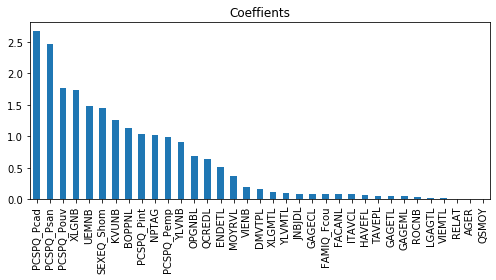

In [50]:
plt.figure(figsize=(7,4))
coef.plot(kind='bar')
plt.title('Coeffients')
plt.tight_layout()

send(plt,8)
plt.show()

## Plot de la performance et nombre de variables actives en fonction de la pénalité

In [59]:
# ignore warnings for better clarity (may not be the best thing to do)...
import warnings
warnings.filterwarnings('ignore')

Pour C= 1.0e-04, le score sur le test est 66.5 et le nombre de features ultilisées est 2
Pour C= 1.0e-03, le score sur le test est 68.5 et le nombre de features ultilisées est 3
Pour C= 1.0e-02, le score sur le test est 72.5 et le nombre de features ultilisées est 10
Pour C= 1.0e-01, le score sur le test est 81.5 et le nombre de features ultilisées est 26
Pour C= 1.0e+00, le score sur le test est 84.5 et le nombre de features ultilisées est 33
Pour C= 1.0e+01, le score sur le test est 84.0 et le nombre de features ultilisées est 35
Pour C= 1.0e+02, le score sur le test est 83.5 et le nombre de features ultilisées est 35
Pour C= 1.0e+03, le score sur le test est 83.0 et le nombre de features ultilisées est 35
Pour C= 1.0e+04, le score sur le test est 84.0 et le nombre de features ultilisées est 35


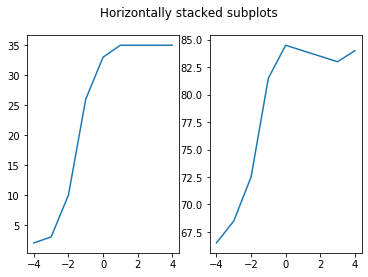

In [77]:
score_test = []
nombre_feat_act = []
Cs = np.logspace(-4,4,9)
for C in Cs:
    LassoOpt = LogisticRegression(penalty="l1", C=C)
    LassoOpt = LassoOpt.fit(xApp, yApp)
    
    # Récupération des coefficients
    print(
        "Pour C= %.1e, le score sur le test est %.1f et le nombre de features ultilisées est %d"
        % (C, (100*LassoOpt.score(xTest,yTest)), (35-np.sum(LassoOpt.coef_==0))))
    score_test.append(100*LassoOpt.score(xTest,yTest))
    nombre_feat_act.append((35-np.sum(LassoOpt.coef_==0)))                  

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(np.log10(Cs), nombre_feat_act, )
ax2.plot(np.log10(Cs), score_test)    


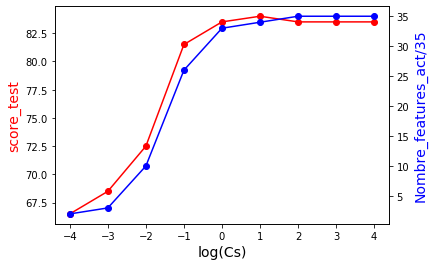

In [76]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(np.log10(Cs), score_test, color="red", marker="o")
# set x-axis label
ax.set_xlabel("log(Cs)",fontsize=14)
# set y-axis label
ax.set_ylabel("score_test",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(np.log10(Cs), nombre_feat_act ,color="blue",marker="o")
ax2.set_ylabel("Nombre_features_act/35",color="blue",fontsize=14)
plt.show()

**Q** Quelles sont les variables importantes? Comment interpréter?

**Q** La pénalisation Lasso est-elle effective?

Il serait intéressant de comparer acec les versions *ridge* et *elestic net* d'optiisation du modèle.

### Courbe ROC

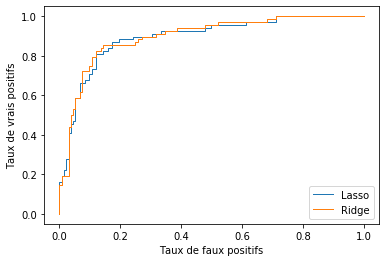

In [88]:
from sklearn.metrics import roc_curve
listMethod=[["Lasso",logitLasso],["Ridge",logitRidge]]

for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
send(plt,8)
plt.show()

## Analyse discriminante
Trois méthodes sont disponibles: paramétrique linéaire ou quadratique et non paramétrique (*k* plus proches voisins).

In [33]:
from sklearn import discriminant_analysis
from sklearn.neighbors import KNeighborsClassifier

### Dicriminante linéaire
Estimation du modèle; il n'y a pas de procédure de sélection de variables proposées. Puis prévision de l'échantillon test.

In [34]:
lda = discriminant_analysis.LinearDiscriminantAnalysis()
disLin=lda.fit(xApp, yApp)
# Prévision de l'échantillon test
yChap = disLin.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur de prévision sur le test
print("Erreur de test lda = %f" % (1-disLin.score(xTest,yTest)))

CARVP    0   1
row_0         
0      120  18
1       12  50
Erreur de test lda = 0.150000


/Users/dieuleve/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


**Q** Que dire de la qualité? Des possibilités d'interprétation?

**Q** Que signifie le *warning*? Quelles variables osnt en cause?
### Discriminante quadratique

In [35]:
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
disQua=qda.fit(xApp, yApp)

/Users/dieuleve/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [36]:
# Prévision de l'échantillon test
yChap = disQua.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur de prévision sur le test
print("Erreur de test qda = %f" % (1-disQua.score(xTest,yTest)))

CARVP    0   1
row_0         
0      116  29
1       16  39
Erreur de test qda = 0.225000


### K plus proches voisins

In [37]:
knn=KNeighborsClassifier(n_neighbors=10)
# Définition du modèle
disKnn=knn.fit(xApp, yApp)
# Prévision de l'échantillon test
yChap = disKnn.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur de prévision sur le test
print("Erreur de test knn = %f" % (1-disKnn.score(xTest,yTest)))
send(("Erreur de test knn = %f" % (1-disKnn.score(xTest,yTest))),11)

CARVP    0   1
row_0         
0      116  44
1       16  24
Erreur de test knn = 0.300000


<Response [200]>

In [26]:
yChap

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1])

In [27]:
#Optimisation du paramètre de complexité k
#Grille de valeurs
param_grid=[{"n_neighbors":list(range(1,15))}]
disKnn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
disKnnOpt=disKnn.fit(xApp, yApp) # GridSearchCV est lui même un estimateur
# paramètre optimal
disKnnOpt.best_params_["n_neighbors"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-disKnnOpt.best_score_,disKnnOpt.best_params_))

Meilleur score = 0.293163, Meilleur paramètre = {'n_neighbors': 6}


In [28]:
# Prévision de l'échantillon test
yChap = disKnnOpt.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)

# Estimation de l'erreur de prévision sur l'échantillon test
print("Erreur de test knn_opt = %f" % (1-disKnnOpt.score(xTest,yTest)))

CARVP    0   1
row_0         
0      120  42
1       12  26
Erreur de test knn_opt = 0.270000


Courbes ROC

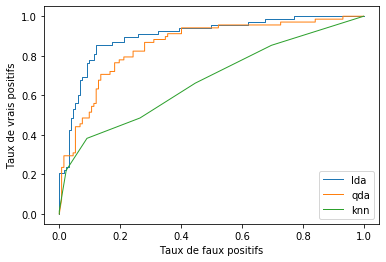

In [29]:
from sklearn.metrics import roc_curve
# Liste des méthodes
listMethod=[["lda",disLin],["qda",disQua],["knn",disKnnOpt]]
# Tracé des courbes
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

## [Arbres binaires de décision](http://wikistat.fr/pdf/st-m-app-cart.pdf)
Les arbres binaires de décision concurrencent la régression logistique et gardent une place de choix dans les services de Gestion de la Relation Client, maintenant de *Science des Données*, par la facilité d'interprétation des modèles qui en découlent. L'optimisation de la complexité d'un artbre peut être délicate à opérer cr très sensible aux fluctuations de l'échantillon.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
# définition du modèle
tree= DecisionTreeClassifier()
treeC=tree.fit(xApp, yApp)

In [81]:
treeC

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Q** Quel est le critère d'homogénéité des noeuds utilisé par défaut?
Gini !

In [98]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,20))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(xApp, yApp)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.125145, Meilleur paramètre = {'max_depth': 3}


In [99]:
# Prévision de l'échantillon test
yChap = treeOpt.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)# Erreur de prévision sur le test
print("Erreur de test tree qualitatif = %f" % (1-treeOpt.score(xTest,yTest)))

CARVP    0   1
row_0         
0      122  22
1       10  46
Erreur de test tree qualitatif = 0.160000


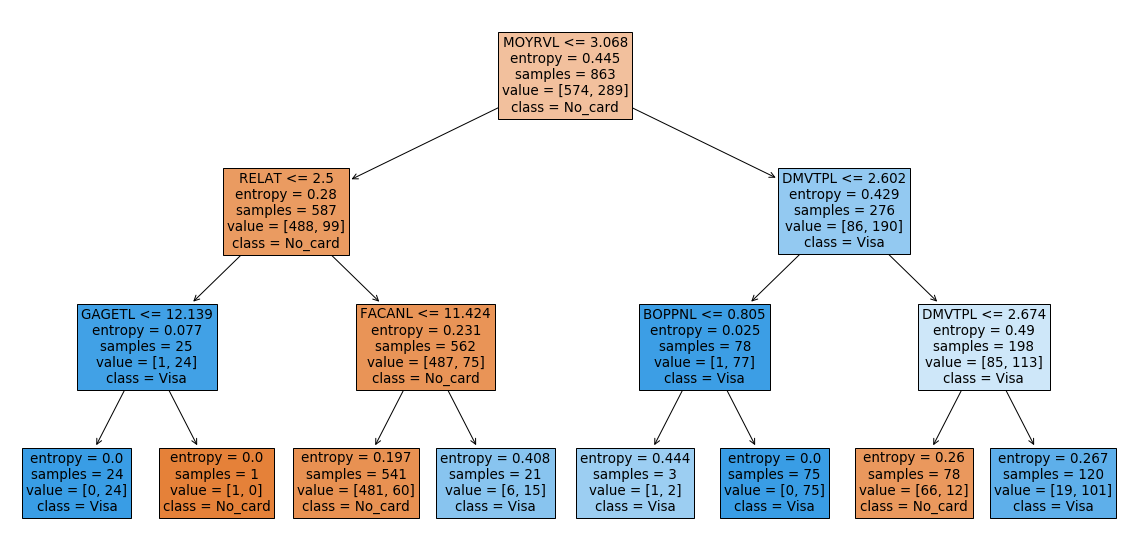

In [132]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.externals.six import StringIO  

treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(xApp,yApp)
#dot_data = StringIO() 
#export_graphviz(treeG, out_file=dot_data) 
#graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_png("treeOpt.png")  
plt.figure(figsize=(20,10))
plot_tree(treeG, feature_names = xApp.columns, 
               class_names=['No_card', 'Visa'],
               filled = True)
plt.savefig('treeOpt.png')

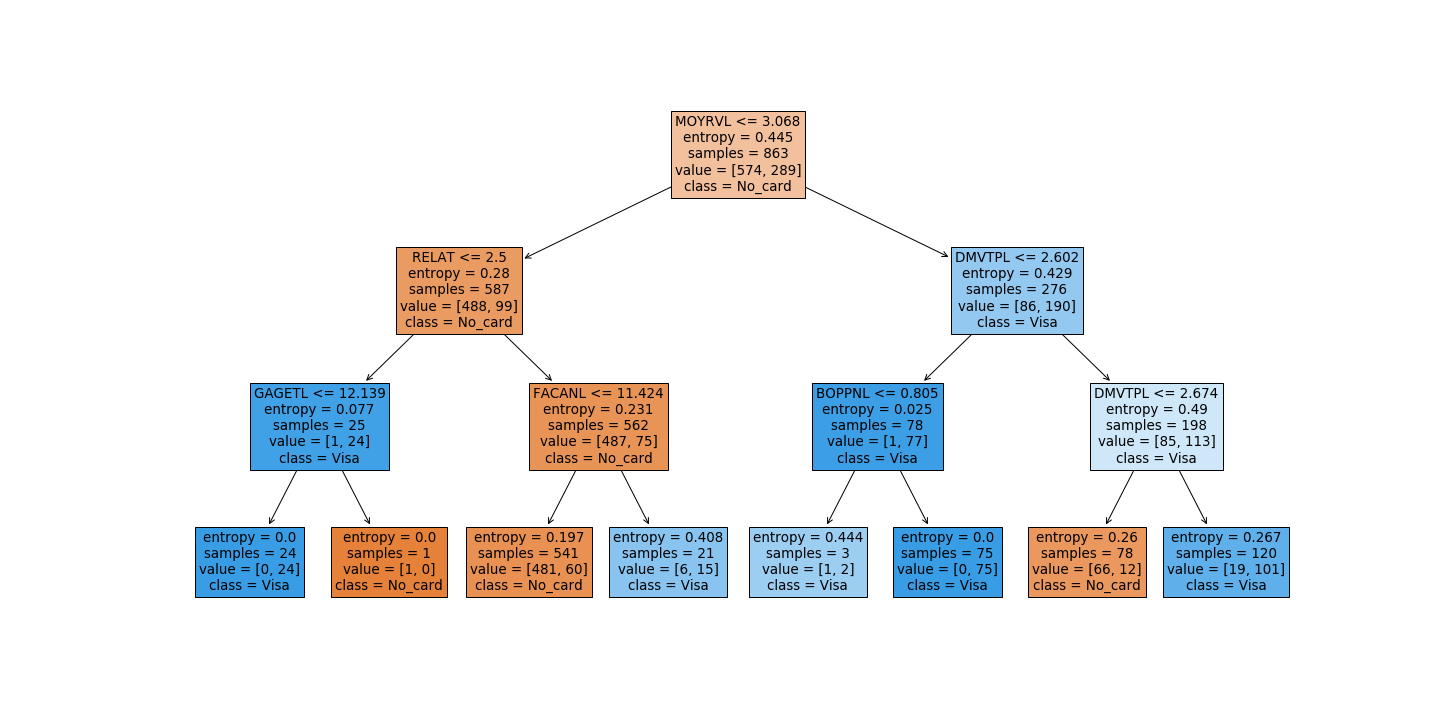

In [133]:
from IPython.display import Image
Image(filename='treeOpt.png')

### [Courbes ROC](http://wikistat.fr/pdf/st-m-app-risque.pdf)
Comparaison des méthodes précédentes.

La valeur de seuil par défaut (0.5) n'étant pas nécessairement celle "optimale", il est important de comparer les courbes ROC.

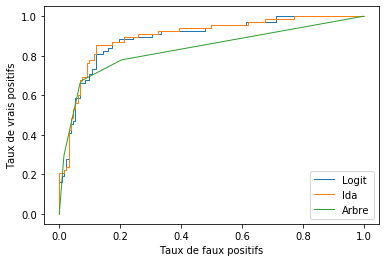

In [89]:
# Liste des méthodes
listMethod=[["Logit",logitLasso],["lda",disLin],["Arbre",treeOpt]]
# Tracé des courbes
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

Commenter les résultats.

**Q** Intérêt de la régression logistique par rapport à l'analyse discriminante linéaire?



L'échantillon test reste de taille modeste (200). une étude plus systématique est nécessaire ainsi que la prise en compte des autres méthodes.

## [Algorithmes d'agrégation de modèles](http://wikistat.fr/pdf/st-m-app-agreg.pdf)
Il s'agit de comparer les principaux algorithmes issus de l'apprentissage machine: *bagging, random forest, boosting*.

### *Bagging*

**Q** Quel est par défaut l'estimateur qui est agrégé? 

**Q** Quel est le nombre d'estimateurs par défaut? Est-il nécessaire de l'optimiser?

In [97]:
from sklearn.ensemble import BaggingClassifier
bag= BaggingClassifier(n_estimators=100,oob_score=False)
bagC=bag.fit(xApp, yApp)
# Prévision de l'échantillon test
yChap = bagC.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)

# Erreur de prévision sur le test
print("Erreur de test avec le bagging = %f" % (1-bagC.score(xTest,yTest)))

CARVP    0   1
row_0         
0      121  17
1       11  51
Erreur de test avec le bagging = 0.140000


**Q** Exécuter plusieurs fois la cellule ci-dessus. Que penser de la stabilité de l'estimation de l'erreur et donc de sa fiabilité?

### *Random forest*

**Q** Quel paramètre doit être optimisé pour cet algorithme? Quel est sa valeur par défaut?

**Q** Le nombre d'arbres de la forêt est-il un paramètre sensible?

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
# Optimisation de max_features
param=[{"max_features":list(range(2,36,4))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),param,cv=5,n_jobs=-1)
rfOpt=rf.fit(xApp, yApp)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.095017, Meilleur paramètre = {'max_features': 14}


In [107]:
# Prévision de l'échantillon test
yChap = rfOpt.predict(xTest)

# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)

# Erreur de prévision sur le test
print("Erreur de test random forest opt -quantitatif = %f" % (1-rfOpt.score(xTest,yTest)))

CARVP    0   1
row_0         
0      121  14
1       11  54
Erreur de test random forest opt -quantitatif = 0.125000


In [114]:
myforest= RandomForestClassifier(n_estimators=100)
myforest.fit(xApp, yApp)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
importances = myforest.feature_importances_

In [134]:
print("Feature ranking:")

std = np.std([tree.feature_importances_ for tree in myforest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(xApp.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, xApp.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature MOYRVL (0.110615)
2. feature DMVTPL (0.105952)
3. feature QCREDL (0.104860)
4. feature RELAT (0.081533)
5. feature QSMOY (0.055519)
6. feature FACANL (0.055465)
7. feature ITAVCL (0.044396)
8. feature BOPPNL (0.038866)
9. feature GAGETL (0.036520)
10. feature SEXEQ_Shom (0.029884)
11. feature AGER (0.026673)
12. feature GAGEML (0.025434)
13. feature TAVEPL (0.024954)
14. feature ROCNB (0.021849)
15. feature GAGECL (0.020161)
16. feature YLVMTL (0.017802)
17. feature KVUNB (0.016767)
18. feature JNBJDL (0.016669)
19. feature PCSPQ_Pint (0.016368)
20. feature HAVEFL (0.015982)
21. feature PCSPQ_Pcad (0.015325)
22. feature OPGNBL (0.014491)
23. feature XLGMTL (0.013951)
24. feature UEMNB (0.013410)
25. feature ENDETL (0.011988)
26. feature PCSPQ_Psan (0.011591)
27. feature YLVNB (0.008107)
28. feature VIEMTL (0.007488)
29. feature PCSPQ_Pouv (0.006992)
30. feature XLGNB (0.006853)
31. feature LGAGTL (0.006560)
32. feature PCSPQ_Pemp (0.005290)
33. feature FAMIQ

### *Gradient boosting*

**Q** Quel est l'algorithme de *boosting* historique? Lequel est utilisé ici?

**Q** Quels sont les paramètres qu'il est important de contrôler, optimiser?

**Q** Quelle est la valeur par défaut de celui non optimisé ci-dessous?

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
# Optimisation de deux paramètres
paramGrid = [
  {'n_estimators': list(range(100,601,50)), 'learning_rate': [0.1,0.2,0.3,0.4]}
 ]
gbmC= GridSearchCV(GradientBoostingClassifier(),paramGrid,cv=5,n_jobs=-1,verbose=2)
gbmOpt=gbmC.fit(xApp, yApp)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - gbmOpt.best_score_,gbmOpt.best_params_))

Fitting 5 folds for each of 44 candidates, totalling 220 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:   25.7s finished


Meilleur score = 0.075319, Meilleur paramètre = {'learning_rate': 0.2, 'n_estimators': 200}


In [110]:
# Prévision de l'échantillon test
yChap = gbmOpt.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)

# Erreur de prévision sur le test
print("Erreur de test gbm opt = %f" % (1-gbmOpt.score(xTest,yTest)))

CARVP    0   1
row_0         
0      123  18
1        9  50
Erreur de test gbm opt = 0.135000


### Courbes ROC

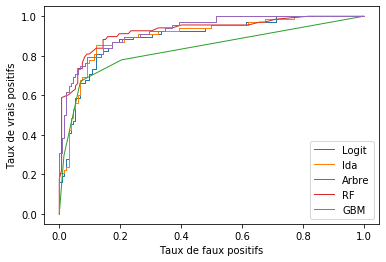

In [111]:
# Liste des méthodes
listMethod=[["Logit",logitLasso],["lda",disLin],["Arbre",treeOpt],["RF",rfOpt],["GBM",gbmOpt]]
# Tracé des courbes
for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

**Q** Quelles meilleure méthode interprétable? Quelle meilleure méthode?

**Q** Que dire de l'*extrem gradient boosting* ? Du nombre de paramètres à optimiser? De son implémentation en Python par rapport à R? 

**Exercice** Ajouter les réseaux de neurones et les SVM dans la comparaison.

## [Validation croisée *Monte Carlo*](http://wikistat.fr/pdf/st-m-app-risque-estim.pdf)
L'échantillon est de faible taille (#200), et les estimations des taux de bien classés comme le tracé des courbes ROC sont très dépendants de l’échantillon test; on peut s’interroger sur l’identité du modèle le plus performant ainsi que sur la significativité des différences observées entre les méthodes. Il est donc important d’itérer le processus (validation croisée *Monte Carlo*) sur plusieurs échantillons tests. Exécuter la fonction en annexe en choisissant les méthodes semblant les plus performantes. 

In [ ]:
from sklearn.utils import check_random_state
import time
check_random_state(13)
tps0=time.clock()
# définition des estimateurs
logit = LogisticRegression(penalty="l1")
lda   = discriminant_analysis.LinearDiscriminantAnalysis()
arbre = DecisionTreeClassifier()
rf    = RandomForestClassifier(n_estimators=200)
gbm   = GradientBoostingClassifier()
# Nombre d'itérations
B=3 # pour utiliser le programme, mettre plutôt B=30
# définition des grilles de paramètres
listMethGrid=[
    [logit,{"C":[0.5,1,5,10,12,15,30]}],
    [lda,{}],
    [arbre,{"max_depth":[2,3,4,5,6,7,8,9,10]}],
    [rf,{"max_features":[2,3,4,5,6]}],
    [gbm,{"n_estimators": list(range(100,601,50)),"learning_rate": [0.1,0.2,0.3,0.4]}]
    ]
# Initialisation à 0 des erreurs pour chaque méthode (colonne) et chaque itération (ligne)
arrayErreur=np.empty((B,5))
for i in range(B):   # itérations sur B échantillons test
    # extraction apprentissage et test
    xApp,xTest,yApp,yTest=train_test_split(vispremR,y,test_size=200)
    # optimisation de chaque méthode et calcul de l'erreur sur le test
    for j,(method, grid_list) in enumerate(listMethGrid):
        methodGrid=GridSearchCV(method,grid_list,cv=5,n_jobs=-1).fit(xApp, yApp)
        methodOpt = methodGrid.best_estimator_
        methFit=methodOpt.fit(xApp, yApp)
        arrayErreur[i,j]=1-methFit.score(xTest,yTest)
tps1=time.clock()
print("Temps execution en mn :",(tps1 - tps0)/60)

In [ ]:
dataframeErreur=pd.DataFrame(arrayErreur,columns=["Logit","LDA","Arbre","RF","GBM"])

In [ ]:
# Distribution des erreurs
dataframeErreur[["Logit","LDA","Arbre","RF","GBM"]].boxplot(return_type='dict')
plt.show()

**Q** Finalement, quelle meilleure méthode? Quelle meilleure méthode interprétable?

**Exercice**: tester `XGBoost`.

In [ ]:
# Moyennes
dataframeErreur.mean()